In [1]:
import pandas as pd

#Filepath
research_file = '../data/raw/dataset_of_injuriesResearches.xlsx'
original_kaggle_file = '../data/raw/player_injuries_impact original KAGGLE.xlsx'
edited_kaggle_file = '../data/processed/player_injuries_impact(Edited).xlsx'

#Download Excell-Sheets
df_research = pd.read_excel(research_file)
df_kaggle_original = pd.read_excel(original_kaggle_file)
df_kaggle_edited = pd.read_excel(edited_kaggle_file)

###TEST###
print('Researches:')
print(df_research.head())
print('Kaggle(original):')
print(df_kaggle_original.head())
print('Kaggle(edited):')
print(df_kaggle_edited.head())

Researches:
                    Study   Sample Size  \
0   Bjørneboe et al (2014)          NaN   
1      Eirale et al (2013)        230.0   
2      Eirale et al (2012)         36.0   
3  Dauty and Collon (2011)        173.0   
4   Ekstrand et al (2011a)       2299.0   

                                        Injury Type   \
0  Muscle injuries: 1057 (46%)\nJoint injuries: 6...   
1                                 Strain: 79 (36,4%)   
2  Strain: 24 (30,8%)\nContusion: 12 (15,4%)\nSpr...   
3                                                NaN   
4                          Muscle injury: 2908 (31%)   

                                     Injury Location  \
0  Thigh: 506 (22%)\nAnkle: 412 (18%)\nKnee: 379 ...   
1  Thigh: 85 (39,2%)\nKnee: 33 (15,2%)\nAnkle: 26...   
2  Thigh: 26 (33,3%)\nKnee: 13 (16,7%)\nLeg: 8 (1...   
3                         Hamstrings: most frequenta   
4  Hamstrings: 1084 (37%)\nQuadriceps: 485 (19%)\...   

  Injury Mechanism Type (Traumatic / Overuse)\n\n Conta

In [2]:
from sqlalchemy import create_engine

#Creating database in data/processed
engine = create_engine('sqlite:///../data/processed/sql_injuries.db')

#Saving kaggle data to sql_injuries.db
df_kaggle_edited.to_sql('injuries', con = engine, index = False, if_exists = 'replace') 

###TEST###
df_from_sql = pd.read_sql('SELECT * FROM injuries LIMIT 5;', con=engine)
print(df_from_sql)

                   Name    Team Name              Position  Age  \
0       Boubacar Kamara  Aston Villa  Defensive Midfielder   24   
1          Jacob Ramsey  Aston Villa  Attacking Midfielder   23   
2          Jordan Beyer      Burnley           Center Back   23   
3  Jean-Philippe Gbamin      Everton  Defensive Midfielder   24   
4          Aaron Hickey    Brentford            Right Back   22   

                                             Injury    Injury Category  \
0                                        Knee injury       Knee Injury   
1                                         Toe injury   Unknown / Other   
2                                        knee injury       Knee Injury   
3  hamstring injury, archilles tendon rupture and...        Polytrauma   
4                                   Hamstring injury  Hamstring Injury   

               Date of Injury       Date of return  Days in Rehabilitation  
0  2024-02-11 00:00:00.000000              Present                     NaN 

In [3]:
df_kaggle_edited.dtypes


Name                              object
Team Name                         object
Position                          object
Age                                int64
Injury                            object
Injury Category                   object
Date of Injury            datetime64[ns]
Date of return                    object
Days in Rehabilitation           float64
dtype: object

In [4]:
import pandas as pd  

df_kaggle_edited['Date of return'] = pd.to_datetime(
    df_kaggle_edited['Date of return'], 
    format='%d.%m.%Y', 
    errors='coerce'
)

text_cols = ['Position', 'Injury ', 'Injury Category']
for col in text_cols:
    df_kaggle_edited[col] = df_kaggle_edited[col].astype('category')

df_kaggle_edited['Downtime (days)'] = (
    df_kaggle_edited['Date of return'] - df_kaggle_edited['Date of Injury']
).dt.days

In [5]:
df_kaggle_edited.dtypes

Name                              object
Team Name                         object
Position                        category
Age                                int64
Injury                          category
Injury Category                 category
Date of Injury            datetime64[ns]
Date of return            datetime64[ns]
Days in Rehabilitation           float64
Downtime (days)                  float64
dtype: object

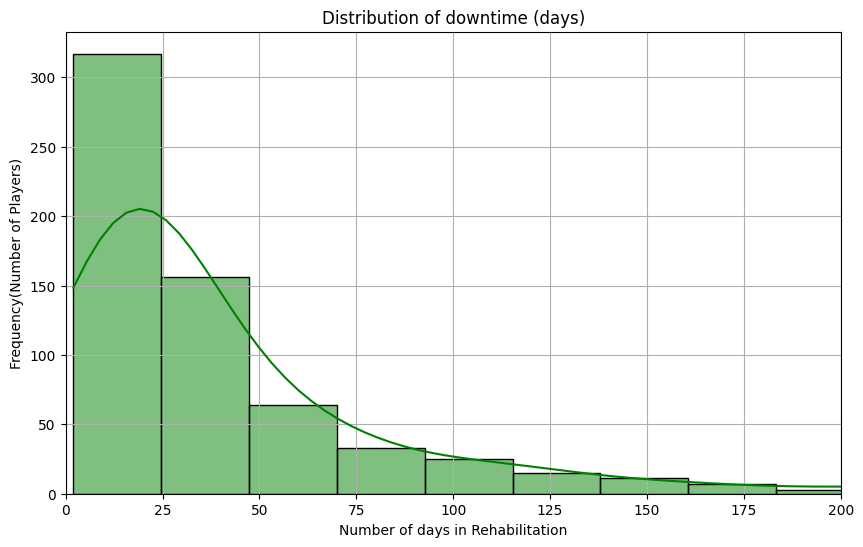

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Creating graph 10x6 inch and limit X-achse from 0 to 100 days
plt.figure(figsize = (10,6))
plt.xlim(0,200)

#Creating Histogramm
sns.histplot(df_kaggle_edited['Downtime (days)'], bins = 30, kde = True, color = 'green')

#Signing Graph
plt.title("Distribution of downtime (days)")
plt.xlabel("Number of days in Rehabilitation")
plt.ylabel("Frequency(Number of Players)")

#Result
plt.grid(True)
plt.show()

C:\Users\magmu\AppData\Local\Temp\ipykernel_11160\2707387137.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  downtime_by_injury = df_no_poly.groupby('Injury Category')['Downtime (days)'].mean().sort_values(ascending=False)


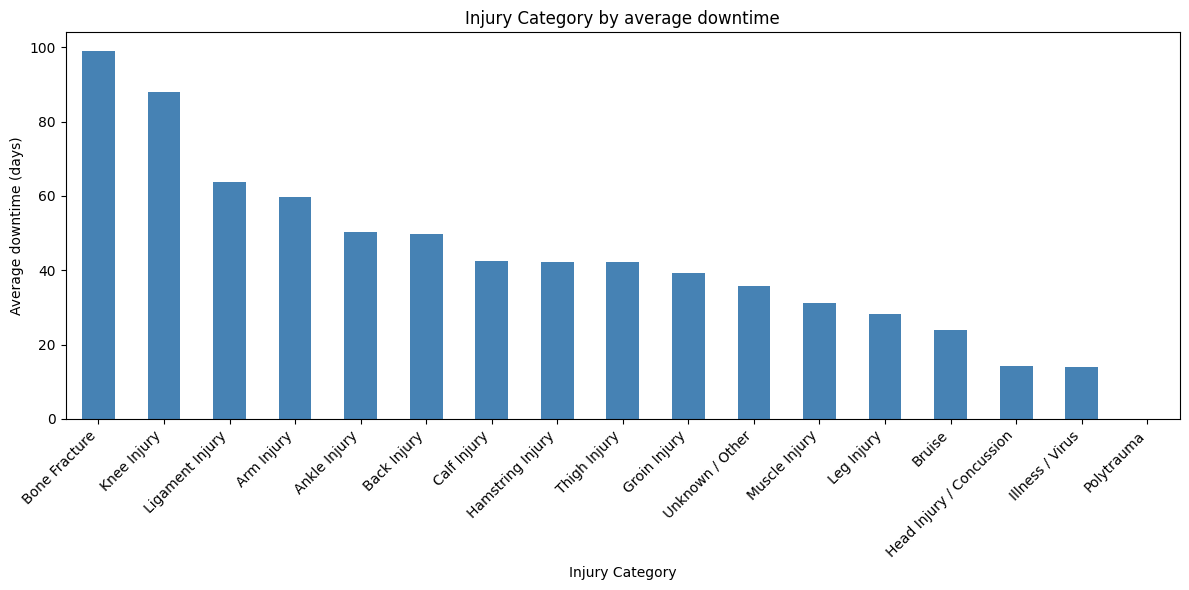

C:\Users\magmu\AppData\Local\Temp\ipykernel_11160\2707387137.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  downtime_by_position = df_no_poly.groupby('Position')['Downtime (days)'].mean().sort_values(ascending=False)


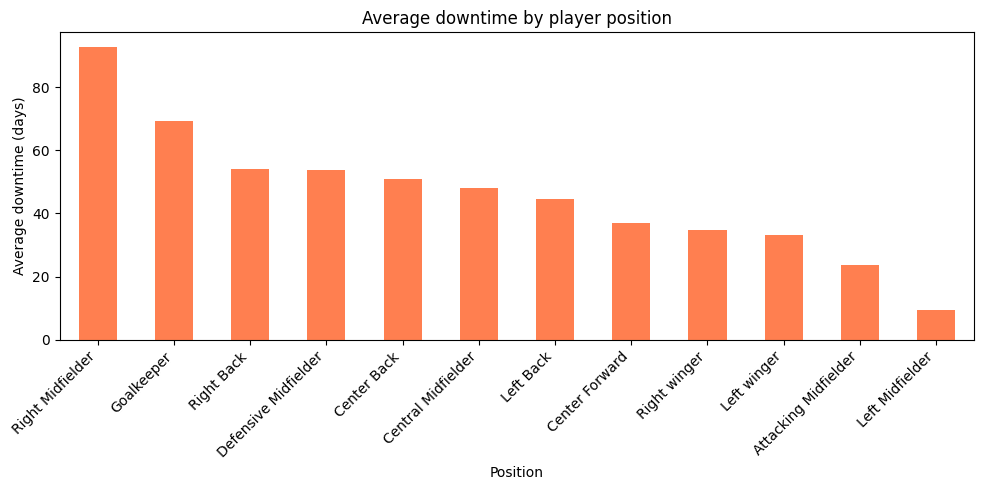

C:\Users\magmu\AppData\Local\Temp\ipykernel_11160\2707387137.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  downtime_by_position = df_no_poly.groupby('Position')['Downtime (days)'].median().sort_values(ascending=False)


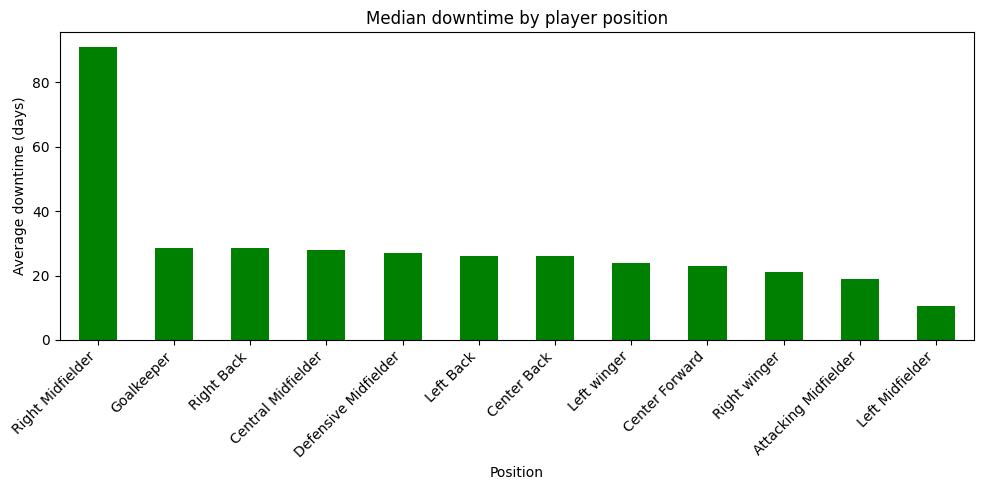

C:\Users\magmu\AppData\Local\Temp\ipykernel_11160\2707387137.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_no_poly, x='Position', y='Downtime (days)', palette='Set3')


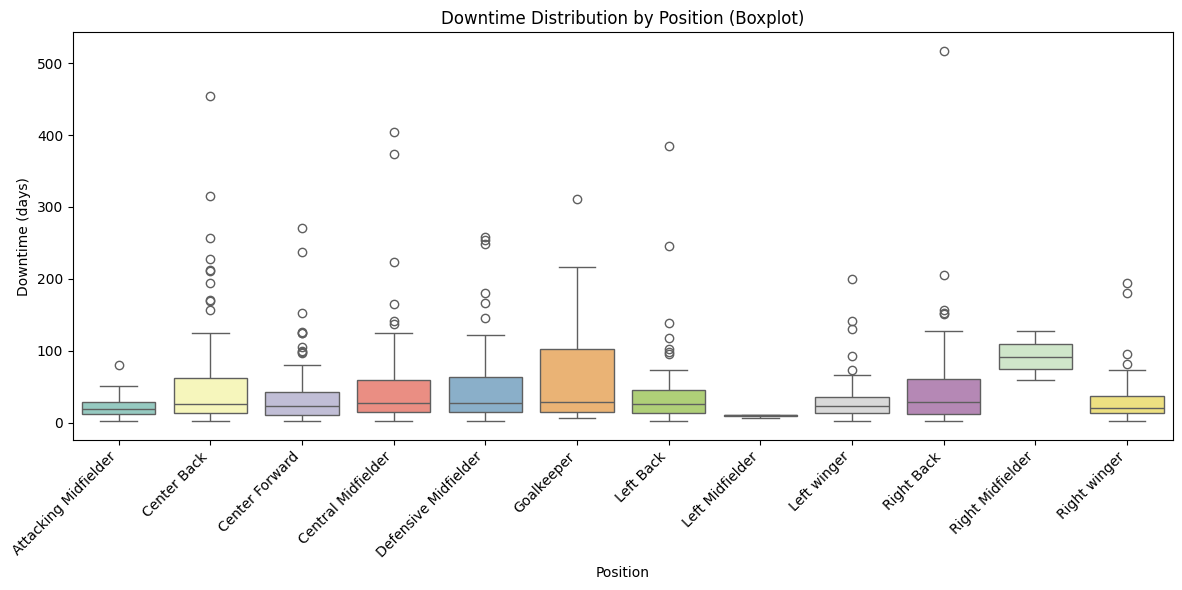

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# mean by injury to days 
df_no_poly = df_kaggle_edited[df_kaggle_edited['Injury Category'] != 'Polytrauma']
downtime_by_injury = df_no_poly.groupby('Injury Category')['Downtime (days)'].mean().sort_values(ascending=False)


#Creating graph 12x6 inch 
plt.figure(figsize = (12,6))
downtime_by_injury.plot(kind='bar', color='steelblue')

#Signing Graph
plt.title('Injury Category by average downtime')
plt.ylabel('Average downtime (days)')
plt.xlabel('Injury Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## mean by Position to days
df_no_poly = df_kaggle_edited[df_kaggle_edited['Injury Category'] != 'Polytrauma']
downtime_by_position = df_no_poly.groupby('Position')['Downtime (days)'].mean().sort_values(ascending=False)

# Creating Graph
plt.figure(figsize=(10,5))
downtime_by_position.plot(kind='bar', color='coral')


# Signing
plt.title('Average downtime by player position')
plt.ylabel('Average downtime (days)')
plt.xlabel('Position')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## median by Position to days
df_no_poly = df_kaggle_edited[df_kaggle_edited['Injury Category'] != 'Polytrauma']
downtime_by_position = df_no_poly.groupby('Position')['Downtime (days)'].median().sort_values(ascending=False)

# Creating Graph
plt.figure(figsize=(10,5))
downtime_by_position.plot(kind='bar', color='green')


# Signing
plt.title('Median downtime by player position')
plt.ylabel('Average downtime (days)')
plt.xlabel('Position')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Boxplot of Position to downtime
plt.figure(figsize=(12,6))
sns.boxplot(data=df_no_poly, x='Position', y='Downtime (days)', palette='Set3')

plt.title('Downtime Distribution by Position (Boxplot)')
plt.ylabel('Downtime (days)')
plt.xlabel('Position')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()